In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
# 한글 폰트 적용
from matplotlib import rc
import matplotlib.font_manager as fm

# 시스템에 설치된 폰트 확인
fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 폰트 설정, 확인
plt.rc('font', family='NanumGothic')
plt.rcParams['font.family']

font_location = 'C:\\Windows\\Fonts\\NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [2]:
welfare_raw = pd.read_csv('welfare.csv')
welfare = welfare_raw.copy()
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [3]:
welfare = welfare.drop(['Unnamed: 0'], axis=1)

In [4]:
# < 6. 연령대별 성별 월급 차이 >
# 1. 변수 검토 및 전처리(연령대, 성별, 월급)
welfare['성별'].dtypes # dtypes('float64')
welfare['성별'].value_counts()
# female    9120
# male      7471rufcmrcl dltkdg

welfare['성별'] = np.where(welfare['성별'] == 9, np.nan, welfare['성별'])

# 연령대를 7개 그룹으로 생성
welfare = welfare.assign(연령대 = np.where(welfare['나이']<20, np.nan,
                                 np.where(welfare['나이']<30, '20대',
                                 np.where(welfare['나이']<40, '30대',
                                 np.where(welfare['나이']<50, '40대',
                                 np.where(welfare['나이']<60, '50대',
                                 np.where(welfare['나이']<70, '60대',
                                 np.where(welfare['나이']<80, '70대',
                                 np.where(welfare['나이']<90, '80대', np.nan)))))))))
welfare

,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...
16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,nan
16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [5]:
# 문자열 nan을 결측치 NaN으로 변경
welfare['연령대'].replace({'nan':np.nan}, inplace=True)
welfare

,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...
16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대


In [6]:
# 확인
welfare['연령대'].value_counts()

연령대
70대    2699
60대    2575
80대    2196
50대    2076
40대    1910
20대    1381
30대    1343
Name: count, dtype: int64

In [7]:
# 결측치 확인
welfare['연령대'].isna().sum()

2411

In [8]:
# 월급 변수 확인
welfare['월급'].dtype # dtypes('float64')

dtype('float64')

In [9]:
welfare['월급'].describe() # 결측치가 아닌... 5633

count    5633.000000
mean      275.647080
std       214.807673
min         0.000000
25%       125.000000
50%       236.000000
75%       363.000000
max      2017.000000
Name: 월급, dtype: float64

In [10]:
ageg2_income = welfare.dropna(subset=['월급', '연령대']) \
                    .groupby('연령대', as_index=False) \
                    .agg(평균월급=('월급', 'mean'))
ageg2_income

,연령대,평균월급
0,20대,226.533003
1,30대,324.901472
2,40대,384.272801
3,50대,356.465013
4,60대,227.810939
5,70대,76.680328
6,80대,34.648734


In [11]:
# 2. 분석표(통계요약표)
ageg2_gender_income = welfare.dropna(subset=['연령대', '월급']) \
                            .groupby(['연령대', '성별'], as_index=False) \
                            .agg(평균월급=('월급', 'mean'))
ageg2_gender_income

,연령대,성별,평균월급
0,20대,남성,241.823293
1,20대,여성,215.868347
2,30대,남성,361.808765
3,30대,여성,276.272966
4,40대,남성,471.732867
5,40대,여성,264.933206
6,50대,남성,461.847458
7,50대,여성,241.111317
8,60대,남성,315.994805
9,60대,여성,153.357456


<Axes: xlabel='연령대', ylabel='평균월급'>

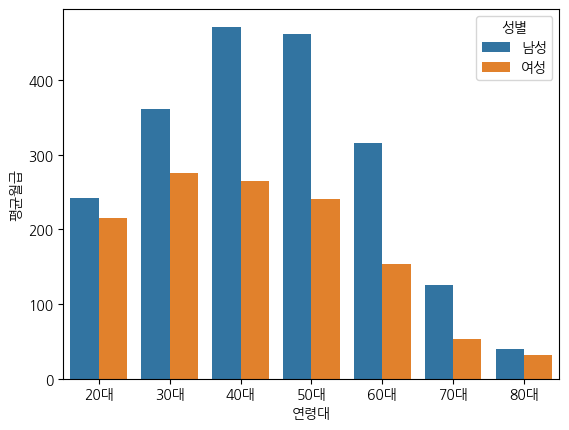

In [16]:
# 3. 시각화 - barplot
sns.barplot(data=ageg2_gender_income, x='연령대', y='평균월급', hue='성별')

In [ ]:
# 4. 분석 결과
# 20대에 남성과 여성의 평균 월급의 차이가 26만원으로 조금 밖에 차이가 나지 않았다.
# 30대에 남성은 361만원, 여성은 276만원으로 평균 월급의 차이가 85만원으로 크게 차이가 나기 시작했다.
# 50대에 남성은 461만원, 여성은 241만원으로 '2배' 가까운 평균 월급의 차이를 보이게 되었다.
# 이후에는 평균 급여가 급격하게 감소, 님성과 여성의 차이가 비슷하게 유지, 남성과 여성의 비슷한 차이를 보이다가
# 80대에 거의 비슷한 평균 급여를 받게 되는 것을 알 수 있다.

In [17]:
welfare.to_csv('welfare.csv')

In [18]:
welfare = pd.read_csv('welfare.csv')
welfare

,Unnamed: 0,성별,출생년도,혼인상테,종교,월급,직종번호,지역,나이,연령별,연령대
0,0,여성,1945.0,2.0,1.0,NaN,NaN,1.0,77.0,노년,70대
1,1,남성,1948.0,2.0,2.0,172.0,942.0,1.0,74.0,노년,70대
2,2,남성,1942.0,3.0,1.0,100.0,762.0,1.0,80.0,노년,80대
3,3,남성,1962.0,1.0,1.0,268.0,855.0,1.0,60.0,노년,60대
4,4,여성,1963.0,1.0,1.0,140.0,399.0,1.0,59.0,중년,50대
...,...,...,...,...,...,...,...,...,...,...,...
16586,16586,남성,1975.0,1.0,2.0,833.0,222.0,2.0,47.0,중년,40대
16587,16587,여성,1976.0,1.0,2.0,NaN,NaN,2.0,46.0,중년,40대
16588,16588,여성,2009.0,0.0,2.0,NaN,NaN,2.0,13.0,청년,NaN
16589,16589,남성,1964.0,1.0,1.0,NaN,248.0,6.0,58.0,중년,50대
